# Supervised Learning Classification Using K-Nearest Neighbors (KNN)

### What is K-Nearest Neighbors?

KNN is another supervised machine learning algorithm. It is a relatively simple algorithm compared to other algorithms. It works by comparing the query instances distance to the other training samples and selecting the K-neighbor classes to be the prediction of the quere instance.

### Implementing KNN in Python
To implemenent KNN from scratch using Python, lets import the modules that we'll need.

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
data=pd.read_csv("KNN.csv")
data

,x,y,c
0,1,1,A
1,2,2,A
2,4,3,B
3,3,3,A
4,3,5,B
5,5,6,B
6,5,4,B


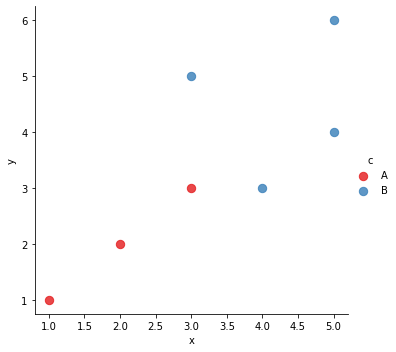

In [3]:
sns.lmplot('x','y',data=data,hue='c',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.show()

### Calculating the Distance Between the Points
In order to find the nearest neighbor of a given point, you need to calculate the Euclidean distance between two points.

Given two points, $p=(p_{1},p_{2},...p_{n})$ and $q=(q_{1},q_{2},...q_{n})$ the distance between $p$ and $q$ is given by the following formula: $$\sqrt{(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+(q_{n}-p_{n})^{2}}$$ based on the formula, you can now define a function named euclidean_distance() as follows:

In [4]:
#--- To calculate the distance between two points---#
def euclidean_distance(pt1,pt2,dimension):
    distance=0
    for x in range(dimension):
        distance += np.square(pt1[x]-pt2[x])
    return np.sqrt(distance)

The euclidean_distance() function can find the distance between two points in any dimension. In this example, the points we are dealing with are in 2D.

#### Implementing KNN
Next define a function named knn(), whic takes in the training points, the test point, and the value of k:

In [5]:
#---our own KNN model---#
def knn(training_points,test_point,k):
    distances={}
    
    #---the number of axes we are dealing with---#
    dimension = test_point.shape[1]
    
    #---calculating euclidean distance between each point
    # in the training data and test data
    for x in range(len(training_points)):
        dist= euclidean_distance(test_point,training_points.iloc[x],dimension)
        
        #--- record the distance for each training points---# 
        distances[x]=dist[0]
        
    #---sort the distances---#
    sorted_d=sorted(distances.items(),key=operator.itemgetter(1))
    
    #---to store the neighbors---#
    neighbors=[]
    
    #---extract the top k neighbors---#
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    
    #---for each neighbor found, find its class---#
    class_counter={}
    for x in range(len(neighbors)):
        #---find out the class for that particular point---#
        cls=training_points.iloc[neighbors[x]][-1]
        
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls]=1
            
        #---sort the class_counter in descending order---#
        sorted_counter=sorted(class_counter.items(), key=operator.itemgetter(1),reverse=True)
        
    #---return the class with the most count, as well as the neighbors found---#
    return(sorted_counter[0][0],neighbors)

The function returns the class to which the test point belongs, as well as the indeces of all nearest k neighbors

#### Making Predictions
With the knn() function defined, you can now make some predictions:

In [6]:
#---Test Point---#
test_set=[[3,3.9]]
test=pd.DataFrame(test_set)
cls,neighbors=knn(data,test,5)
print("Predicted Class:" + cls)

Predicted Class:B


### Visualizing Different Values of K
It is useful to be able to visualize the ffect of applying various values of k. The following code snippet draws a series of concentric circles around the test point based on the values of k, which range from 7 to 1, with intervals of -2:

k= 7
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
5  5  6  B
0  1  1  A
k= 5
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
k= 3
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
k= 1
Class A
Neighbors
   x  y  c
3  3  3  A


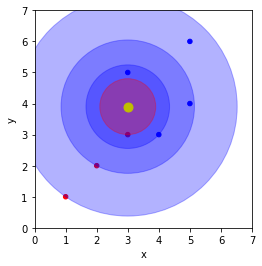

In [7]:
#---gnerate the color map for the scatter plot--#
#---if colum 'c' is A, then use Red, else use Blue---#


colors=['r' if i== 'A' else 'b' for i in data['c']]
ax=data.plot(kind='scatter',x='x',y='y',c=colors)
plt.xlim(0,7)
plt.ylim(0,7)

#---plot the test point---#
plt.plot(test_set[0][0],test_set[0][1],"yo",markersize='9')

for k in range(7,0,-2):
    cls,neighbors=knn(data,test,k)
    print("==============")
    print("k=",k)
    print("Class",cls)
    print("Neighbors")
    print(data.iloc[neighbors])
    
    furthest_point=data.iloc[neighbors].tail(1)
    
    #---draw a circle connecting the test point and the furthest point---#
    radius=euclidean_distance(test,furthest_point.iloc[0],2)
    
    #---display the circle in red if classification is A, else display circle in blue---#
    c='r' if cls=='A' else 'b'
    circle=plt.Circle((test_set[0][0], test_set[0][1]),radius,color=c,alpha=0.3)
    ax.add_patch(circle)
plt.gca().set_aspect('equal',adjustable='box')
plt.show()

The figure above shows a series of circles centered around the test point, with varying values of k. The innermost circle is for k=1, with the next outer ring for k=3, and so on. As you can see if k=1, circle is red, meaning that the yellow point has been classified as class A. If the circle is blue, this means that the yellow point has been classified as B. This is evident in the outer three circles. 

## Using Scikit-Learns KNeighborsClassifier Class for KNN

Now that you see how KNN works and how it cane be implemented manually in Python, lets use the implementation provided by Scikit-learn.
The following code snippet loads the Iris dataset and plots it out using scatter plot:

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

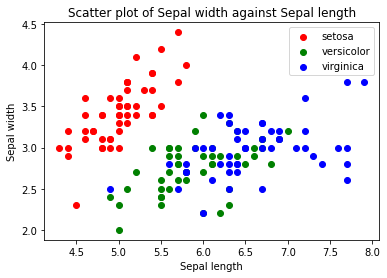

In [8]:
%matplotlib inline
from sklearn import svm, datasets

iris=datasets.load_iris()

X=iris.data[:,:2] #take the first two features
y=iris.target

print(X)
print(iris.target)

#---plot the points---#
colors=['red','green','blue']
for color, i, target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

In [9]:
display(iris.target_names)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploring Different Values of K
We can now use Scikit-learns KNeighborsClassifier class to help us train a model on Iris dataset using KNN. For a start, lets use a k of 1:

(array([0, 1, 2]), array([50, 51, 49]))


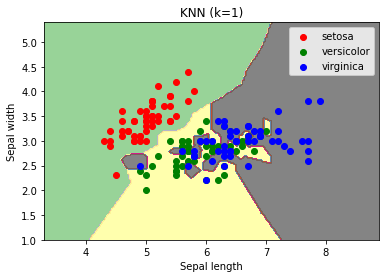

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k=1
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)

#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best',shadow=False,scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


In [11]:
display(x_min)
display(x_max)
display(y_min)
display(y_max)

3.3

8.9

1.0

5.4

The preceding code meshgrid (a rectangular grid of values) of points scattered across the x- and y-axes. Each point is then sued for prediction, and the result is drawn using a color plot. In this figure, it shows the calssification boundary using a k of 1. Notice that for k=1, you perform your prediction based solely on a single sample-your nearest neighbor. This makes your prediction very sensitive to all sorts of distortions, such as outliers, mislabeling, and so on. In general, setting k=1 usually leads to overfitting and as a result your predictions are not very accurate.

For KNN, setting k to a higher value tends to make your prediction more robust against noise in your data. Using the same code snippet lets vary the values of k. 

(array([0, 1, 2]), array([50, 44, 56]))


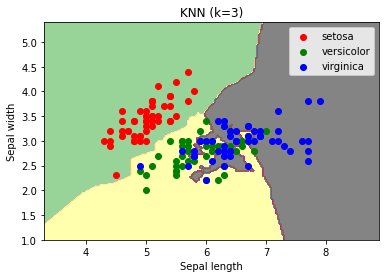

In [12]:
k=3
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)

#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best',shadow=False,scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


(array([0, 1, 2]), array([51, 46, 53]))


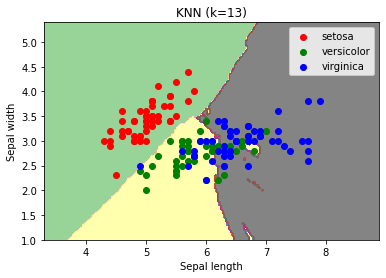

In [13]:
k=13
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)

#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best',shadow=False,scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))



(array([0, 1, 2]), array([51, 49, 50]))


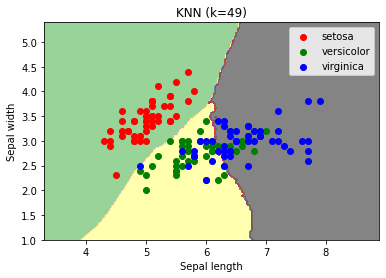

In [14]:
k=49
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)

#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best',shadow=False,scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


(array([0, 1, 2]), array([57, 58, 35]))


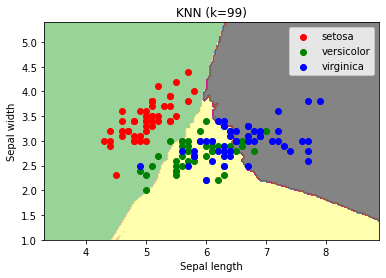

In [15]:
k=99
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)

#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best',shadow=False,scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


(array([0, 1, 2]), array([51, 46, 53]))


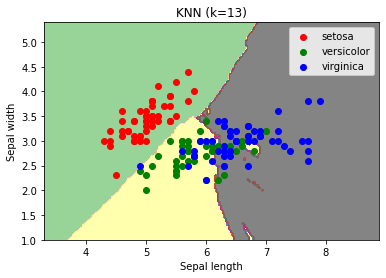

In [16]:
k=13
#---instantiate learning model---#
knn=KNeighborsClassifier(n_neighbors=k)

#---fitting the model---#
knn.fit(X,y)

#---min and max for the first feature---#
x_min, x_max=X[:,0].min()-1,X[:,0].max() + 1

#---min and max for the second feature---#
y_min, y_max=X[:,1].min()-1, X[:,1].max() + 1

#---step size in mesh---#
h=(x_max/x_min)/100

#---make predictions for each of the points in xx,yy---#
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

#---draw teh result using a color plot---#
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Accent,alpha=0.8)

#---plot the training points---#
colors=['red','green','blue']
for color,i,target in zip(colors,[0,1,2],iris.target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=color,label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best',shadow=False,scatterpoints=1)

predictions=knn.predict(X)

#---classifications based on predictions---#
print(np.unique(predictions,return_counts=True))


Note that as k increases, the boundary becomes smoother. But it also means that the more points will be classified incorrectly. When k increases to a large value, underfitting occurs. 

### Cross-Validation
We have witnessed from previous chapters, that we split our dataset into two individual sets--one for training ando ne for testing. However, the data in your dataset may not be distributed evenly, and as a result your test set may be too simple or too hard to predict, thereby making it very difficult to know if your model works well.

Instead of using part of the data for training and part for testing, you can split the data into k-folds and train the model k times, rotating the training and testing sets, By doing so, each data point is now being used for training and testing.

#### Parameter-Tuning K
Now that you understand cross-validation, lets use it on our Iris dataset. We will train the model using all of the four features, and as the same time we shall use cross-validation on the dataset using 10 folds. We will do this for each value of k:

In [17]:
from sklearn.model_selection import cross_val_score

#---holds the cv (cross-validates) scores---#
cv_scores=[]

#---use all features---#
X=iris.data[:,:4]
y=iris.target

#---number of folds---#
folds=10

#---creating odd list of K for KNN---#
ks=list(range(1,int(len(X)*((folds-1)/folds))))

#---remove all multiples of 3---#
ks=[k for k in ks if k % 3 !=0]

#---perform k-fold cross-validation---#
for k in ks:
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #---performs cross-validation and returns the average accuracy---#
    scores= cross_val_score(knn,X,y,cv=folds,scoring='accuracy')
    mean=scores.mean()
    cv_scores.append(mean)
    print(k,mean)
    

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

The Scikit-learn library provides the cross_val_score() function that performs cross-validation for you automatically, and it reutnrs the metrics that you want (for example, accuracy). When using cross-validation, be aware that at any one time, there will be $((folds-1/folds)*total_rows$ available for training. This is because $(1/folds)*total_rows$ will be used for testing. 

For KNN, there are 3 rules yo which you must adhere:

The value of k cannot exceed the numbero f rows for training

The value of k should be an odd number (so you can avoid situations where there is a tie between classes) for a two class problem.

The value of k must not be a multiple of the number of classes (to avoid ties, similar to the previous point)


Hence, the ks list in the preceding code will contain the following values

In [18]:
print(ks)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134]


After training, the cv_scores will contain a list of accuracies based on the different values of k

### Finding the Optimal K
To find the optimal k, you simple find the value of k that gives the highest accuracy. Or in this case, you willw ant to find the lowest misclassification error (MSE).

The following code snippet finds the MSE for each k, and then finds the k with the lowest MSE. It then plots a line chart of MSE against k.

The optimal number of neighbors is 13


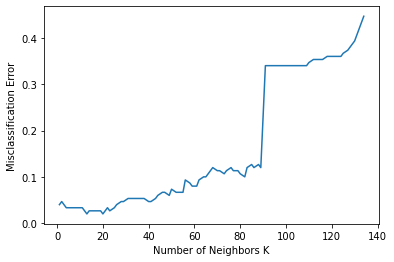

In [19]:
#---calculate misclassification error for each k---#
MSE=[1-x for x in cv_scores]

#---dtermining best k (min.MSE)---#
optimal_k=ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

#---plot misclassification error vs k---#
plt.plot(ks,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()